# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Ознакомление с данными и общая информация 

### 1.1 Импорт библиотеки pandas и считывание данных из csv-файла.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')

In [3]:
pd.set_option('display.max_columns', None)
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

В таблице 21 столбец. Присутствуют столбцы с большим числом пропущенных данных, а также имеются проблемы с типом данных.

**1.4 Гистограмма для всех числовых столбцов таблицы.**

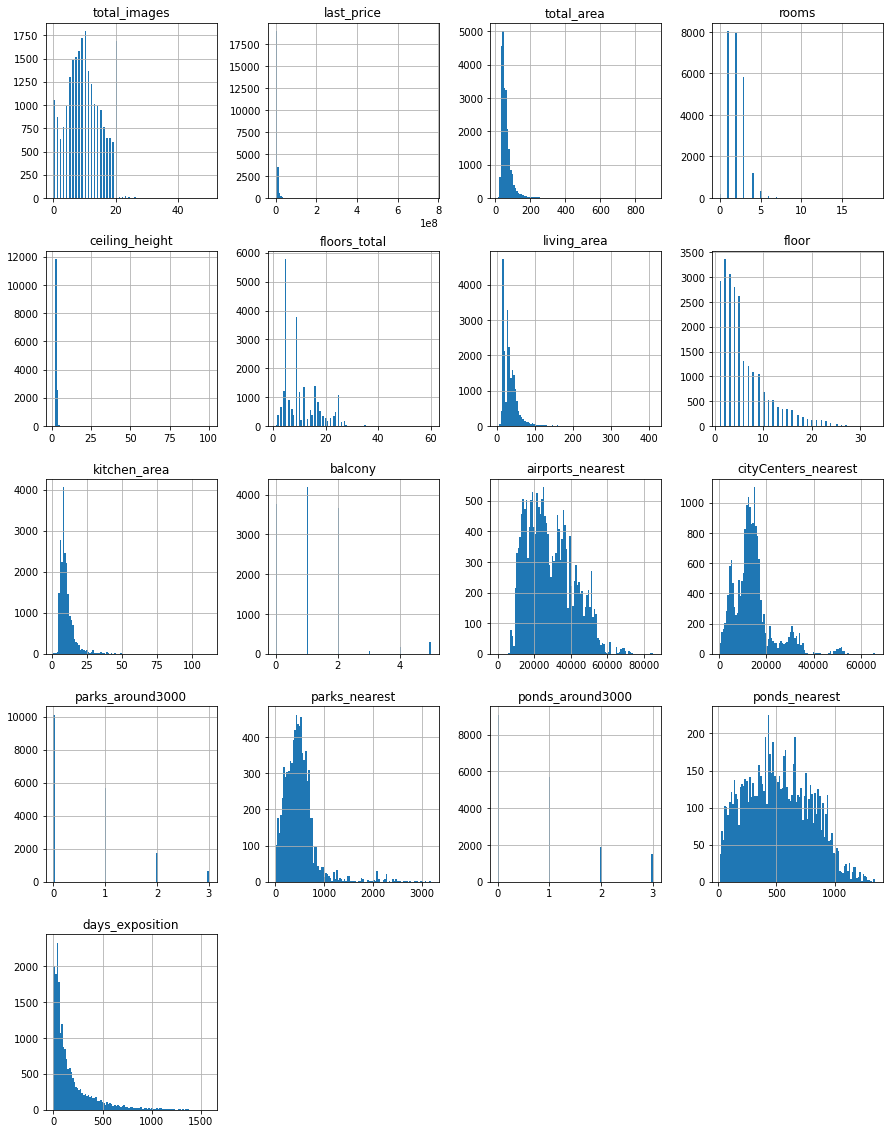

In [5]:
# С помощью метода "DataFrame.select_dtypes()" библиотеки Pandas получим датафрейм с числовыми столбцами
numerical_data = data.select_dtypes(include=['int64', 'float64'])
numerical_data.hist(bins=100, figsize=(15, 20));

Графики полученного набора гистограмм для полноценного анализа пока являются "сырыми". Исследовательский анализ данных, который позволит получить более "полезные" в рамках данного проекта гистограммы, будет произведен позже, а пока необходимо выполнить предобработку данных.  

## Предобработка данных

### 2.1 Работа с пропусками

In [6]:
# подсчет кол-ва пропусков для каждого столбца
data.isna().sum().sort_values(ascending=False)

is_apartment            20924
parks_nearest           15620
ponds_nearest           14589
balcony                 11519
ceiling_height           9195
airports_nearest         5542
cityCenters_nearest      5519
ponds_around3000         5518
parks_around3000         5518
days_exposition          3181
kitchen_area             2278
living_area              1903
floors_total               86
locality_name              49
total_images                0
last_price                  0
studio                      0
floor                       0
rooms                       0
first_day_exposition        0
total_area                  0
open_plan                   0
dtype: int64

* Из таблицы можно видеть, что больше всего значений пропущено в столбце `is_apartment`. Определим, какие значения там есть вообще:

In [7]:
data['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

Как видно, есть оба значения (является и не является апартаментом). Едва ли вероятно, то что отсутствующие значения в столбце 
соответствуют квартирам НЕ апартаментам (т.е. имеющими значение False), т.к. в этом случае их число достигло бы 23649 (т.е. 99.9%). Поскольку эта категория данных определяется пользователем квартиры, то возможно подавляющее большинство пользователей просто не могли знать в чем заключается отличие между квартирой и апартаментом (и не захотели уточнять) и потому просто оставляли данное поле не заполненным.

 * Второй и третьей (с небольшим отрывом) по пропущенным значениям оказались категории `parks_nearest` и `ponds_nearest`. Данные значения определяют расстояние до ближайшего парка и водоема соответственно. Эти типы данных загружались в базу данных автоматизированной системой (геосервисом), поэтому можно предположить, что такое большое кол-во недостающих данных связаны в ошибке работы этой самой системы. По итогу, примерно 63% по обоим категориям оказались не загружены в итоговую таблицу.

Основная цель проекта - определить как отдельные факторы (согласно ТЗ - это общая площадь; жилая площадь; площадь кухни; количество комнат; этаж; дата размещения на продажу) влияют на цену квартиры. Вышеприведенные 2 параметра в эти факторы не входят и потому в рамках данного проекта их можно просто оставить в исходном виде. 

 * На 4-ом месте группа данных по балконам. Определим какие значения здесь есть вообще: 

In [8]:
data['balcony'].value_counts()

1.0    4195
0.0    3758
2.0    3659
5.0     304
4.0     183
3.0      81
Name: balcony, dtype: int64

Если посчитать, что пустые ячейки столбца `balcony` соответствуют значению 0 (нет балкона), то тогда процент квартир без балкона составит 64.4%, что, в принципе, выглядит адекватно. Пропуск данного значения может быть связан с тем, что пользователи при отсутствии балкон-а/ов просто не вписывали никаких значений. В любом случае, заменим NaN на 0:

In [9]:
data['balcony'] = data['balcony'].fillna(0)

* На 5-ом месте по пропускам `ceiling_height` или высота потолков. Столбец не заполнен на 39%. Можно предположить, что высота потолка может зависить или от общего количества этажей в доме `floors_total` - высота всего дома так или иначе влияет на высоту потолков, или от цены `last_price` - более дорогие квартиры наверное имеют высокие потолки и наоборот, или от удаленности от центра `cityCenters_nearest` (это особенно характерно для Петербурга с его исторической застройкой (коммуналки, сталинки и т.д.) в центре и большим кол-вом "панельного" жилья ближе к окраинам/спальным районам, где потолки как правило имеют меньшую высоту). Для того чтобы попытаться определить степень взаимосвязи (или корреляции) `ceiling_height` от 3 приведенных параметров воспользуемся критерием Пирсона:

In [10]:
display(data['ceiling_height'].corr(data['floors_total']))
display(data['ceiling_height'].corr(data['last_price']))
display(data['ceiling_height'].corr(data['cityCenters_nearest']))

-0.028731894622727384

0.08543030982842605

-0.09168887614722751

Критерий Пирсона во всех 3 случаях стремится к 0 и потому говорить о какой-то очевидной зависимости пока не приходится. Для заполнения пропущенных значений `ceiling_height` предпочтительнее использовать `floors_total`, так как процент пустых ячеек здесь мал (0.4%) и есть четкое разделение на группы по "этажности". Параметр `last_price` менее подходящий, так как связь между ценой и высотой потолков кажется менее очевидной. Параметр `cityCenters_nearest` подходит в меньшей степени, поскольку имеет больший процент пропущенных значений - 23%.

Причина пропуска значений в этом столбце - пользователи квартир либо не имели возможности замерить высоту потолков, либо у них банально не было желания это делать.

In [11]:
# Сначала создадим сгруппированный по floors_total объект типа Series с медианными значениями ceiling_height 
ch_median = data.groupby('floors_total').agg({'ceiling_height': ['median']})
ch_median.columns = ['median'] 
display(ch_median) # 36 строк

,median
floors_total,
1.0,2.80
2.0,2.70
3.0,2.80
4.0,3.00
5.0,2.55
6.0,3.00
7.0,3.00
8.0,2.80
9.0,2.55


Как можно видеть из полученной таблицы у `floors_total` равное 33 медианное значение - NaN. Медианой всех значений `ceiling_height` датафрейма заполним те пустые `ceiling_height` для которых `floors_total` равно NaN или медиана по группе равна NaN (у нас это `floors_total` = 33).

In [12]:
for f in data['floors_total'].unique():
    if f == f and ch_median.loc[f, 'median'] == ch_median.loc[f, 'median']: # НЕ равно NaN      
        data.loc[(data['floors_total'] == f) & (data['ceiling_height'].isna()), 'ceiling_height'] = ch_median.loc[f, 'median']
    else:
        data.loc[(data['floors_total'].isna()) | ((data['floors_total'] == f) & (data['ceiling_height'].isna())), 'ceiling_height'] = data['ceiling_height'].median()   

* Далее по пропускам у нас расстояние до ближайшего аэропорта - `airports_nearest` (23% пропущенно) и `cityCenters_nearest` (23% пропущенно). Пропуски в этих столбцах связаны с очередной некорректной работой геосервиса. В ходе дальнейшего анализа нам придется обратится к параметру `cityCenters_nearest` для вычисления средней стоимости квартир Петербурга на разном удалении от центра. Проверим сколько значений данной категории пропущено по Петербургу:

In [13]:
data.loc[(data['locality_name'] == 'Санкт-Петербург') & (data['cityCenters_nearest'].isna())].shape[0] / data[data['locality_name'] == 'Санкт-Петербург'].shape[0] * 100

0.3880160295146619

Пропущено очень мало, оставляем данные категории данных как есть.

* Далее по пропускам - `ponds_around3000` и `parks_around3000`. Аналогично `parks_nearest` и `ponds_nearest` - ошибка геосервиса и малозначимость в рамках нашего исследования.         

* Следующая по пропускам категория - сколько дней было размещено объявление `days_exposition` c 13% пропусков. Причины пропусков могут быть разными - пользователь квартиры не снял статус "в продаже" в "Яндекс-недвижимости" или мог иметь место некоторый сбой в самой системе. В принципе, процент пропусков здесь сравнительно мал, не будем вносить изменений.   

* Далее - `kitchen_area` (площадь кухни) c 9.6% пропусков и `living_area` (жилая площадь) с 8%. По какой-то причине пользователи квартир не указали этих данных - скорее всего просто не имели возможности или желания этого сделать. У квартир-студий жилая и кухонная площадь не отделены друг от друга, тогда либо площадь кухни, либо жилая площадь были не указаны. Определим у скольких квартир-студий отсутствуют значения в столбце `kitchen_area` и `living_area`:   

In [14]:
display(data.loc[(data['studio'] == True) & (data['kitchen_area'].isna())].shape[0])
display(data.loc[(data['studio'] == True) & (data['living_area'].isna())].shape[0])

149

10

Итого всего 6% значений `kitchen_area` 0.5%  значений `living_area` для квартир-студей пропущено - едва ли их заполнение внесет какие-то ощутимые изменения в итоговый расклад по данным. Оставим как есть.

* Оставшиеся `floors_total` и `locality_name` имеют наименьший процент пропущенных значений 0.4% и 0.2% соответ. Причина пропусков - человеческий фактор.

Итого:

In [15]:
data.isna().sum().sort_values(ascending=False)

is_apartment            20924
parks_nearest           15620
ponds_nearest           14589
airports_nearest         5542
cityCenters_nearest      5519
ponds_around3000         5518
parks_around3000         5518
days_exposition          3181
kitchen_area             2278
living_area              1903
floors_total               86
locality_name              49
balcony                     0
total_images                0
last_price                  0
studio                      0
floor                       0
ceiling_height              0
rooms                       0
first_day_exposition        0
total_area                  0
open_plan                   0
dtype: int64

### 2.2 Изменение типов данных

Приведем `first_day_exposition` к формату времени, так как нам придется использовать эти данные в последующем при добавлении новых столбцов: 

In [16]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

### 2.3 Работа с дубликатами

Начнем с простого поиска явных дубликатов:

In [17]:
data.duplicated().sum()

0

Явных дубликатов в таблице нет. Попробуем найти неявные дубликаты. Очевидный столбец на проверку - `locality_name`. Выведем список уникальных значений в столбце:

In [18]:
data['locality_name'].unique() #365

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [19]:
# Устранение неявных дубликатов
data = data.replace(['городской посёлок Янино-1'], 'городской поселок Янино-1')
data = data.replace(['посёлок Мурино', 'поселок Мурино'], 'Мурино')
data = data.replace(['деревня Кудрово'], 'Кудрово')
data = data.replace(['посёлок городского типа Красный Бор'], 'поселок городского типа Красный Бор')
data = data.replace(['городской посёлок Фёдоровское'], 'деревня Фёдоровское')
data = data.replace(['посёлок городского типа Лебяжье'], 'поселок городского типа Лебяжье')
data = data.replace(['село Никольское'], 'Никольское')
data = data.replace(['посёлок городского типа Кузьмоловский'], 'поселок городского типа Кузьмоловский')
data = data.replace(['посёлок Аннино'], 'поселок Аннино')
data = data.replace(['посёлок Новый Свет'], 'поселок Новый Свет')
data = data.replace(['поселок городского типа Рощино', 'посёлок городского типа Рощино'], 'городской посёлок Рощино')
data = data.replace(['посёлок Бугры'], 'поселок Бугры')
data = data.replace(['посёлок городского типа Павлово'], 'городской посёлок Павлово')
data = data.replace(['посёлок Победа'], 'поселок Победа')
data = data.replace(['посёлок Терволово'], 'поселок Терволово')
data = data.replace(['поселок городского типа Советский'], 'городской посёлок Советский')
data = data.replace(['посёлок Петровское'], 'поселок Петровское')
data = data.replace(['посёлок городского типа Токсово'], 'поселок городского типа Токсово')
data = data.replace(['посёлок городского типа Вырица'], 'поселок городского типа Вырица')
data = data.replace(['посёлок Тельмана'], 'поселок Тельмана')
data = data.replace(['поселок городского типа Большая Ижора'], 'городской поселок Большая Ижора')
data = data.replace(['поселок городского типа Лесогорский'], 'городской посёлок Лесогорский')
data = data.replace(['посёлок городского типа имени Свердлова'], 'поселок городского типа имени Свердлова')
data = data.replace(['поселок городского типа Рябово', 'посёлок городского типа Рябово'], 'поселок Рябово')
data = data.replace(['посёлок Поляны'], 'поселок Поляны')
data = data.replace(['посёлок городского типа Мга'], 'городской посёлок Мга')
data = data.replace(['посёлок Мичуринское'], 'поселок Мичуринское')
data = data.replace(['посёлок Ильичёво'], 'поселок Ильичёво')
data = data.replace(['посёлок при железнодорожной станции Вещево'], 'поселок станции Вещево')
data = data.replace(['посёлок Гаврилово'], 'поселок Гаврилово')
data = data.replace(['поселок городского типа Назия'], 'городской посёлок Назия')
data = data.replace(['посёлок Старая Малукса'], 'поселок Старая Малукса')
data = data.replace(['поселок Гарболово'], 'деревня Гарболово')
data = data.replace(['посёлок при железнодорожной станции Приветнинское'], 'поселок станции Приветнинское')
data = data.replace(['посёлок Мельниково'], 'поселок Мельниково')
data = data.replace(['посёлок Усть-Луга'], 'поселок Усть-Луга')
data = data.replace(['поселок Любань'], 'Любань')
data = data.replace(['посёлок Стеклянный'], 'поселок Стеклянный')
data = data.replace(['посёлок городского типа Форносово'], 'поселок городского типа Форносово')
data = data.replace(['посёлок Сумино'], 'поселок Сумино')
data = data.replace(['посёлок Возрождение'], 'поселок Возрождение')
data = data.replace(['посёлок Лисий Нос'], 'поселок Лисий Нос')
data = data.replace(['посёлок Жилгородок'], 'поселок Жилгородок')
data = data.replace(['посёлок Коробицыно'], 'поселок Коробицыно')
data = data.replace(['посёлок Кобралово'], 'поселок Кобралово')
data = data.replace(['посёлок Перово'], 'поселок Перово')
data = data.replace(['посёлок Пансионат Зелёный Бор'], 'поселок Пансионат Зелёный Бор')

In [20]:
len(data['locality_name'].unique())

315

Было устранено 50 дубликатов.

## Добавление новых столбцов

In [21]:
data['price_per_m2'] = (data['last_price'] / data['total_area']).astype(int) # Цена одного квадратного метра
data['exposition_weekday'] = data['first_day_exposition'].dt.weekday # День недели публикации объявления
data['exposition_month'] = data['first_day_exposition'].dt.month  # Месяц публикации объявления
data['exposition_year'] = data['first_day_exposition'].dt.year # Год публикации объявления

# Функция распределения по этажам (первый, последний и другой)
def categor_floor(row):
    floor = row['floor']
    floors_total = row['floors_total']
    
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    else:
        return 'другой'
    
data['floor_cat'] = data.apply(categor_floor, axis=1) # тип этажа квартиры
data['cityCenters_nearest_km'] = (data['cityCenters_nearest'] / 1000).round(0) # расстояние до центра города в километрах

## Исследовательский анализ данных

### 4.1 Общая площадь `total_area`

In [22]:
# Методом describe выведем основные статистические параметры 
data['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

<AxesSubplot:>

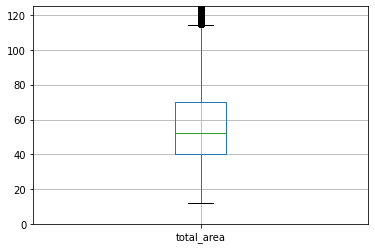

In [23]:
plt.ylim(0, 125)
data.boxplot(column='total_area')

<AxesSubplot:>

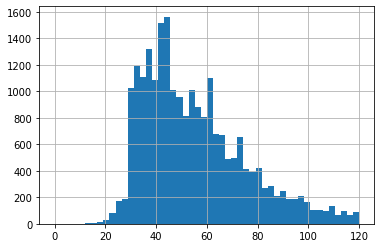

In [24]:
data['total_area'].hist(bins=50, range=(0,120))

"Усы" боксплота: 12 и 114. Они определяют границы за пределами которых значения набора данных являются выбросами.
Из гистограммы видно,что наибольшее число квартир имеют площадь в диапазоне примерно от 30 до 80 кв.м. Наиболее часто встречаются квартиры площадью 45 кв.м.  

### 4.2 Жилая площадь `living_area`

In [25]:
data['living_area'].describe()

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

<AxesSubplot:>

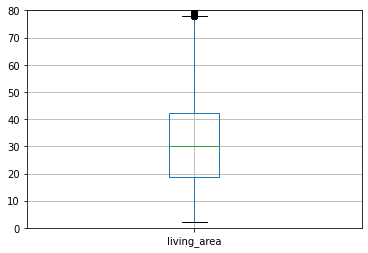

In [26]:
plt.ylim(0, 80)
data.boxplot(column='living_area')

<AxesSubplot:>

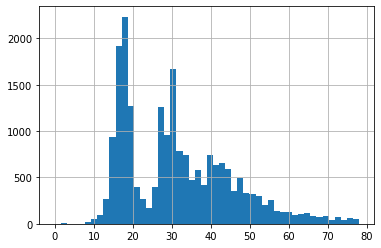

In [27]:
data['living_area'].hist(bins=50, range=(0,78))

"Усы" боксплота: 2 и 78. Из гистограммы видно,что наибольшее число квартир имеют жилую площадь в диапазоне примерно от 15-50 кв.м. 

### 4.3 Площадь кухни `kitchen_area`

In [28]:
data['kitchen_area'].describe()

count    21421.000000
mean        10.569807
std          5.905438
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

<AxesSubplot:>

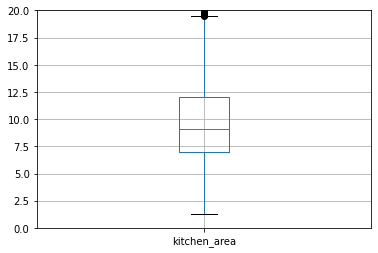

In [29]:
plt.ylim(0, 20)
data.boxplot(column='kitchen_area')

<AxesSubplot:>

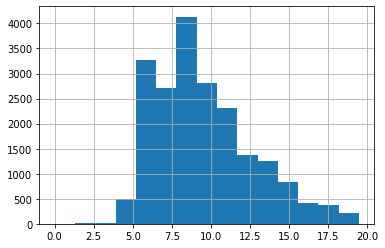

In [30]:
data['kitchen_area'].hist(bins=15, range=(0,19.5))

"Усы" боксплота: 1.3 и 19.5. Из гистограммы видно,что наибольшее число квартир имеют кухню площадью в диапазоне примерно от 5-15 кв.м. Наиболее часто встречаются квартиры с площадью кухни примерно 8 кв.м.

### 4.4 Цена объекта `last_price`

In [31]:
data['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

<AxesSubplot:>

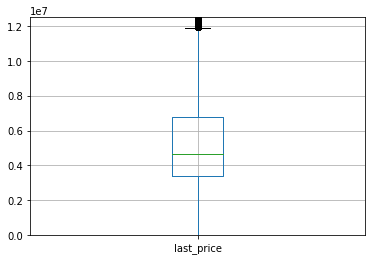

In [32]:
plt.ylim(0, 12.5e+6)
data.boxplot(column='last_price')

<AxesSubplot:>

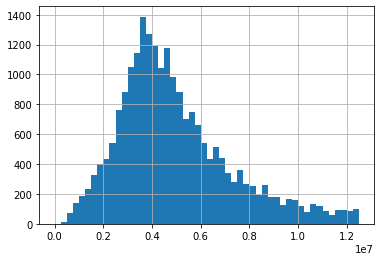

In [33]:
data['last_price'].hist(bins=50, range=(0, 12.5e6))

"Усы" боксплота: 12 000 и 12 000 000. Из гистограммы видно,что большее число квартир продавется по цене примерно от 2 до 6 млн. Наиболее частая цена квартиры - около 4 млн.  

### 4.5 Количество комнат `rooms`

In [34]:
data['rooms'].describe()

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

<AxesSubplot:>

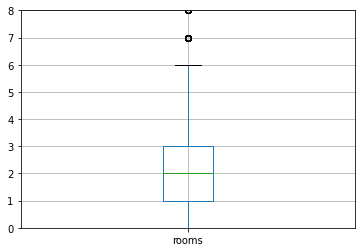

In [35]:
plt.ylim(0, 8)
data.boxplot(column='rooms')

<AxesSubplot:>

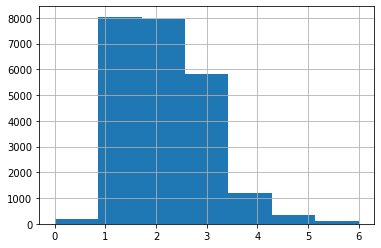

In [36]:
data['rooms'].hist(bins=7, range=(0, 6))

"Усы" боксплота: 0 и 6. Из гистограммы видно,что наибольшее число квартир 1-и 2-комнатные. Наиболее редкие 4 комнатные и далее по убыванию.

### 4.6 Высота потолков `ceiling_height`

In [37]:
data['ceiling_height'].describe()

count    23699.000000
mean         2.735602
std          0.994274
min          1.000000
25%          2.550000
50%          2.650000
75%          2.750000
max        100.000000
Name: ceiling_height, dtype: float64

<AxesSubplot:>

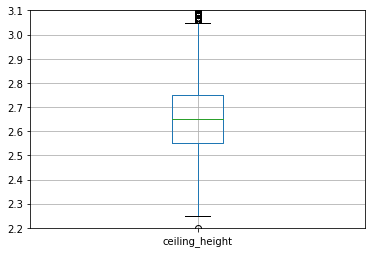

In [38]:
plt.ylim(2.2, 3.1)
data.boxplot(column='ceiling_height')

<AxesSubplot:>

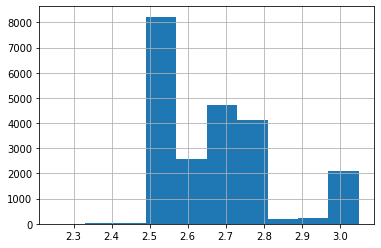

In [39]:
data['ceiling_height'].hist(bins=10, range=(2.25, 3.05))

"Усы" боксплота: 2.25 и 3.05. Из гистограммы видно,что квартиры имеют высоту потолков от 2,4м до 2,8м. Наибольшее число квартир имеют высоту потолка от 2,5м до 2,7м. Также присутсвует заметная, но небольшая часть квартир с потолками примерно 3м. 

### 4.7 Тип этажа квартиры `floor_cat`

<AxesSubplot:>

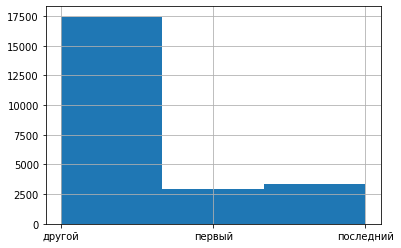

In [40]:
data['floor_cat'].hist(bins=3)

Из гистограммы видно - чаще встерчаются квартиры между 1 и последним этажом. 

### 4.8 Общее количество этажей в доме `floors_total`

In [41]:
data['floors_total'].describe()

count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

<AxesSubplot:>

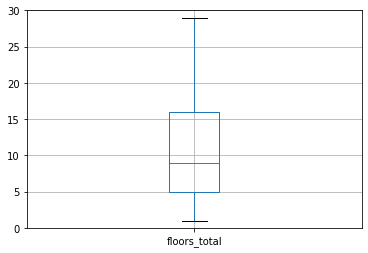

In [42]:
plt.ylim(0, 30)
data.boxplot(column='floors_total')

<AxesSubplot:>

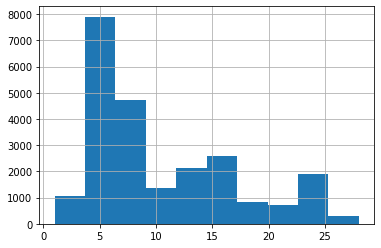

In [43]:
data['floors_total'].hist(bins=10, range=(1, 28))

"Усы" боксплота: 1 и 28. Из гистограммы видно,что большинство квартир расположены в 4-9 этажных домах. Наиболее часто встречаются квартиры в 5-этажках.  

**4.9 Расстояние до центра города в метрах `cityCenters_nearest`**

In [44]:
data['cityCenters_nearest'].describe()

count    18180.000000
mean     14191.277833
std       8608.386210
min        181.000000
25%       9238.000000
50%      13098.500000
75%      16293.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

<AxesSubplot:>

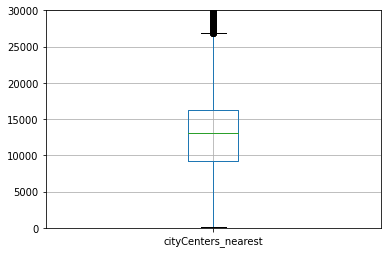

In [45]:
plt.ylim(0, 30000)
data.boxplot(column='cityCenters_nearest')

<AxesSubplot:>

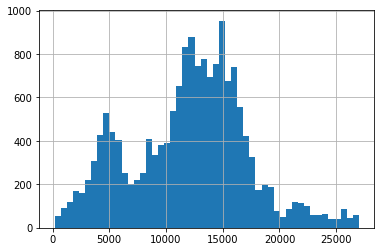

In [46]:
data['cityCenters_nearest'].hist(bins=50, range=(180, 27000))

"Усы" боксплота: 180 и 28 000. Из гистограммы видно,что большинство квартир расположены от центра примерно на расстоянии от 10.000м до 17.500м, чаще всего на 15.000м.

### 4.10 Расстояние до ближайшего парка `parks_nearest`

In [47]:
data['parks_nearest'].describe()

count    8079.000000
mean      490.804555
std       342.317995
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

<AxesSubplot:>

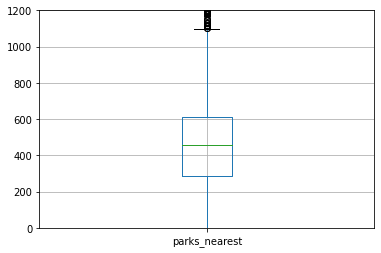

In [48]:
plt.ylim(0, 1200)
data.boxplot(column='parks_nearest')

<AxesSubplot:>

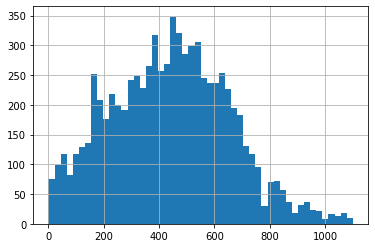

In [49]:
data['parks_nearest'].hist(bins=50, range=(1, 1100))

"Усы" боксплота: 1 и 1100. Из гистограммы видно,что большинство квартир расположены от парка примерно на расстоянии от 200м до 700м, чаще всего на 450м.

<br> Отфильтруем датасет от аномальных значений для потолков, стоимости квартиры, площади и количества комнат, и сохраним в переменную `good_data`. В итоге объем нового датафрейма на 12.8% процентов меньше исходного и лишь чуть превышает 10% -  в принципе должно быть приемлимо. Для дальнейшего анализа используем `good_data`.   
</div>

In [50]:
good_data = data.query('2.25 <= ceiling_height <= 3.05 and 12000 <= last_price <= 12000000 and 12 <= total_area <= 114 and 0 <= rooms <= 6')
display((good_data.shape[0] / data.shape[0]) * 100)

87.22730916916326

### 4.11 Изучение быстроты продажи квартир

In [51]:
good_data['days_exposition'].describe()

count    18219.000000
mean       170.122125
std        208.631665
min          1.000000
25%         43.000000
50%         90.000000
75%        215.000000
max       1580.000000
Name: days_exposition, dtype: float64

Среднее время продажи составляет 170 дней (5,5 мес.), медианное 90 (3 мес.). "Усы" соотвутсвующего боксплота, которые определят интервал значений за пределами которого находятся выбросы: 1 и 512. Построим гистограмму в пределах этого интервала: 

<AxesSubplot:>

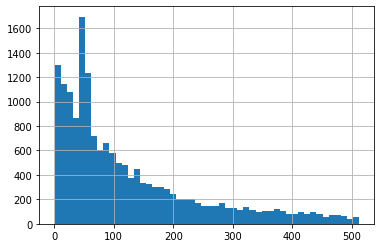

In [52]:
good_data['days_exposition'].hist(bins=50, range=(1, 512))

Из гистограммы видно, что чаще всего квартиры продаются за срок примерно от 45 до 60 дней. Квартиры продающиеся менее чем за 45 дней (1,5 месяца) можно отнести к быстрым продажам, более чем 512 дней (17 месяцев или 1,5 года) к необычно долгим.

<br> Изучим промежуток от 1 до 100 дней. На нем есть 2 странных пика в пределах 40 и 60 дней. Рассмотрим ближе.  
</div>

<AxesSubplot:>

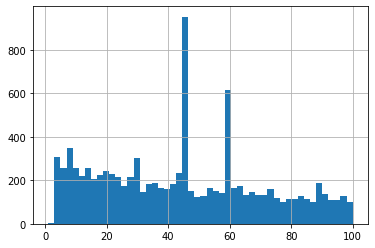

In [53]:
good_data['days_exposition'].hist(bins=50, range=(1, 100))

<AxesSubplot:>

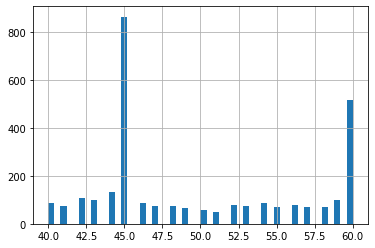

In [54]:
good_data['days_exposition'].hist(bins=50, range=(40, 60))

<br> На 45 и 60 дней день наблюдаются пики продаж. Можно предположить, что на 45 и 60 день сервис Яндекс.Недвижимости по каким-то причинам снимает объявление с продажи.  
</div>

### 4.12 Какие факторы больше всего влияют на полную стоимость объекта?

<AxesSubplot:xlabel='total_area', ylabel='last_price'>

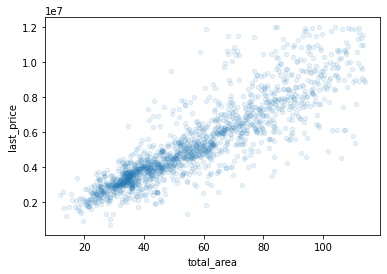

In [55]:
# Общая площадь total_area.
cost_VS_totarea = good_data.pivot_table(index='total_area', values='last_price', aggfunc='median')     
cost_VS_totarea_reset = cost_VS_totarea.reset_index()
cost_VS_totarea_reset.plot.scatter(x='total_area', y='last_price', alpha=0.1)

На графике видно, что стоимость квартиры имеет линейную зависимость от общей площади. Так например, для квартиры площадью 20 кв.м стоимость равна 2,1 млн, а для 80 кв.м. 7 млн. Посмотрим на коэффициент Пирсона:

In [56]:
cost_VS_totarea_reset['total_area'].corr(cost_VS_totarea_reset['last_price'])

0.8718180040652361

<AxesSubplot:xlabel='living_area', ylabel='last_price'>

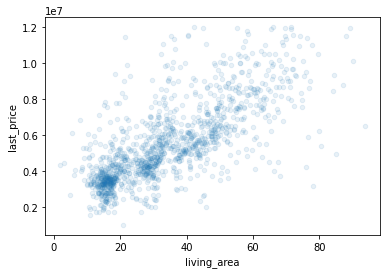

In [57]:
# Жилая площадь living_area. 
cost_VS_livarea = good_data.pivot_table(index='living_area', values='last_price', aggfunc='median')     
cost_VS_livarea_reset = cost_VS_livarea.reset_index()
cost_VS_livarea_reset.plot.scatter(x='living_area', y='last_price', alpha=0.1)

На графике видно, что стоимость квартиры имеет линейную зависимость от жилой площади, однако это менее выражено чем для общей площади. Так например, для квартиры жилой площадью 12 кв.м стоимость равна 3,5 млн, а для 50 кв.м. 6,8 млн. Посмотрим на коэффициент Пирсона:

In [58]:
cost_VS_livarea_reset['living_area'].corr(cost_VS_totarea_reset['last_price'])

0.8053687145761782

<AxesSubplot:xlabel='kitchen_area', ylabel='last_price'>

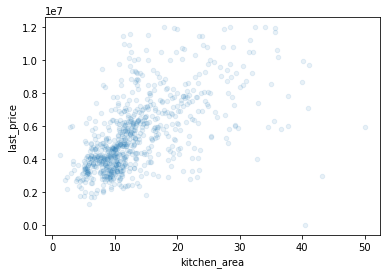

In [59]:
# Кухонная площадь kitchen_area. 
cost_VS_kitarea = good_data.pivot_table(index='kitchen_area', values='last_price', aggfunc='median')     
cost_VS_kitarea_reset = cost_VS_kitarea.reset_index()
cost_VS_kitarea_reset.plot.scatter(x='kitchen_area', y='last_price', alpha=0.1)

На графике видно, что стоимость квартиры имеет линейную зависимость от площади кухни, однако это выражено совсем не так отчетливо чем в случае с общей площадью. Так например, для кухни площадью 5 кв.м стоимость равна 3.2 млн, а для 15 кв.м. 6,7 млн. Посмотрим на коэффициент Пирсона:

In [60]:
cost_VS_kitarea_reset['kitchen_area'].corr(cost_VS_kitarea_reset['last_price'])

0.5836230114500143

<AxesSubplot:xlabel='rooms'>

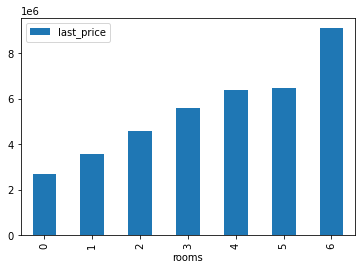

In [61]:
# Число комнат rooms. Здесь хорошо подойдет plotbar. 
good_data.pivot_table(index='rooms', values='last_price', aggfunc='median').plot(kind='bar')

Зависимость линейная - с увеличением числа комнат цена возрастает. Если за 1-комнатную придется отдать 3,6 млн., то за 4-комн уже 9 млн.

<AxesSubplot:xlabel='floor_cat'>

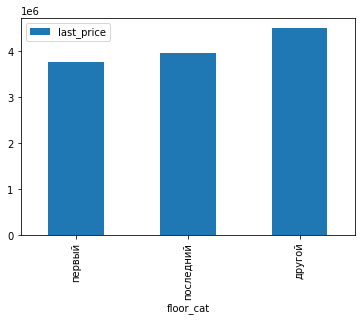

In [62]:
# Категория этажа квартиры floor_cat
good_data.pivot_table(index='floor_cat', values='last_price', aggfunc='median').sort_values(by='last_price').plot(kind='bar')

Из графика видно, что квартиры на 1-ом этаже на 6% дешевле квартир на последнем и 18% дешевле квартир на других этажах.

<AxesSubplot:xlabel='exposition_weekday'>

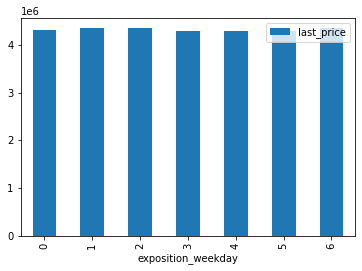

In [63]:
# Дата размещения (день)
good_data.pivot_table(index='exposition_weekday', values='last_price', aggfunc='median').plot(kind='bar')

<AxesSubplot:xlabel='exposition_weekday'>

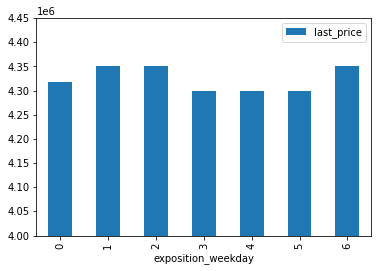

In [64]:
# Подкорректируем границы по оси ординат для лучшей визуализации.
good_data.pivot_table(index='exposition_weekday', values='last_price', aggfunc='median').plot(kind='bar', ylim=(4e6, 4.45e6))

Наибольшая разница между днями публикации на продажу по цене - между втр и субботой в 2% - незначительно. Также можно наблюдать что цена квартир, опубликованных на продажу, меньше всего к к субботе и вновь подрастает в воскресенье.

<AxesSubplot:xlabel='exposition_month'>

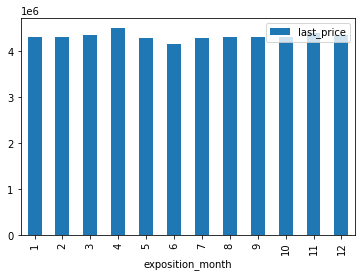

In [65]:
# Дата размещения (месяц)
good_data.pivot_table(index='exposition_month', values='last_price', aggfunc='median').plot(kind='bar')

<AxesSubplot:xlabel='exposition_month'>

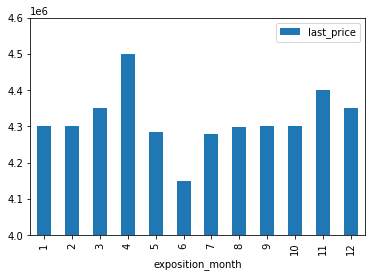

In [66]:
# Подкорректируем границы по оси ординат 
good_data.pivot_table(index='exposition_month', values='last_price', aggfunc='median').plot(kind='bar', ylim=(4e6, 4.6e6))

Из графика видно, что наибольшую цену имеют квартиры опубликованные в апреле, наименьшую в июне, а разница между ними 7%.

<AxesSubplot:xlabel='exposition_year'>

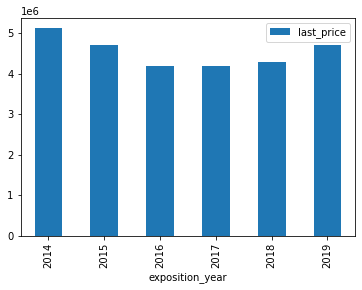

In [67]:
# Дата размещения (год)
good_data.pivot_table(index='exposition_year', values='last_price', aggfunc='median').plot(kind='bar')

Здесь уже содержательней - опубликованные на продажу в 2014 квартиры имели самую высокую стоимость. В 2015-2017 - спад, 2018 -2019 - начинается подъем.

### 4.13 Расчет средней цена кв.м. для 10 населенных пунктов с наибольшим числом объявлений

In [68]:
df_10 = good_data.pivot_table(index='locality_name', values='price_per_m2', aggfunc=['count', 'median'])
df_10.columns = ['count', 'median']
df_10.sort_values(by='count', ascending=False).head(10).sort_values(by='median', ascending=False)

,count,median
locality_name,,
Санкт-Петербург,12940,101960.0
Пушкин,324,98454.0
Кудрово,469,95588.0
посёлок Парголово,326,91779.5
Мурино,588,86175.0
посёлок Шушары,436,76747.5
Колпино,325,74722.0
Гатчина,298,67860.0
Всеволожск,390,65789.0


Из таблицы видно что наибольшая цена кв.м. у квартир Санкт-Петербурга, наименьшая в Выборге. Заметен тренд на снижение стоимости кв.м по мере отдаления от Санкт-Петербурга. 

Построим барплот для наглядности


<AxesSubplot:xlabel='locality_name'>

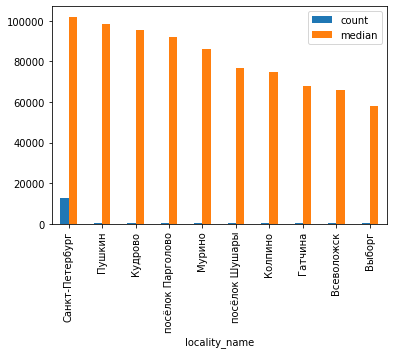

In [69]:
df_10.sort_values(by='count', ascending=False).head(10).sort_values(by='median', ascending=False).plot(kind='bar')

### 4.14 Средняя стоимость квартир Санкт-Петербурга на разном удалении от центра

<AxesSubplot:xlabel='cityCenters_nearest_km'>

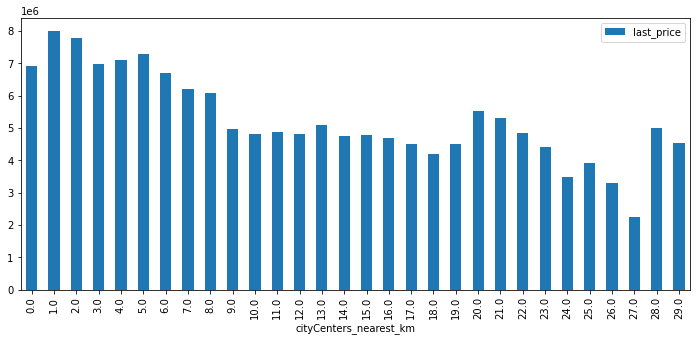

In [70]:
(good_data
 .query('locality_name == "Санкт-Петербург"')
 .pivot_table(index='cityCenters_nearest_km', values='last_price', aggfunc='median')
 .plot(kind='bar', figsize=(12, 5))
)

Ожидаемо, что жилье в центре Петербурга самое дорогое, затем цена идет на спад до 3км зоны, затем поднимается в радиусе 3-5км и снова опускается. В радиусе 9-19км цены остаются примерно на одном уровне, поднимаются в 20км и снова идут на спад. Примечательно, что на расстоянии 28км от центра цены резко возрастают, а затем снова понемногу опускаются.

### Общий вывод

Типичная квартира находящаяся в продаже на сервисе Яндекс.Недвижимость это квартира:
* Площадью 48кв.м.
* 2-комнатная
* расположенная в 9-этажном доме между 1-ым и последним этажом
* проданная за 3 месяца
* по цене 4,3 млн.

В среднем квартира продается в течение 3 месяцев (90 дней). Имеют место быстрые продажи (<45 дней), и даже сверхбыстрые (в течении недели). Последние могут быть проверены на предмет мошенничества. Также встречаются квартиры проданные более чем за 1,5 года и даже за 5 лет - возможно некоторые их них не были вовремя отмечены как проданные и "висели" в продаже продолжительное время.



В наибольшей степени на цену квартиры влияет общая площадь квартиры, затем жилая и в меньшей степени кухонная. Зависимость от эти 3 факторов прямая. Также на цену прямо влияет число комнат: больше комнат - выше цена. Квартиры на 1 и последнем этажах подешевле квартир расположенных между ними. По датам продажи: день недели и месяц слабо влияют на цену в сравнении с годом продажи - в 2014 году цены были наибольшими, затем последующие 4 года цены падали, а с 2018 начался подъем.  

В 10 населенных пунктов наиболее представленных в продажах квартир оказались Санкт-Петербург с его пригородами и 2 отдельных города - Всеволожск и Выборг. Самие дорогие квадратные метры в Петербурге, самые дешевые - в Выборге. С удалением от Петербурга стоимость кв.м. падает - этим объясняется более высокая цена в пригородах Петербурга в сравнении с городами расположенных дальше от него.

По мере удаления от центра цена квартир падает, но не равномерно: в самом центре цены значительно выше, что ожидаемо; далее цена снижается, затем в 3-5 км радиусе вновь повышается. Возможно это связано с тем, в 3-5 км радиус попадают Адмиралтейский, Василеостровский, Петроградский р-ны, которые считаются наиболее престижными в плане недвижимости. 

Касательно работы с данными - наиболее трудоемким оказалось восполнение пропущенных значений, однако в основном были пропущены значения, которые в рамках данного исследования были малозначимы. Необходимо будет скорректировать работу геосервиса, предтсавляющего данные для Яндекс.Недвижимости, а также выставить ограничения на вводимые в базу даных значения (например для высоту потолков, среди которых встречались значения в 100м и т.д.). 